In [1]:
import yfinance as yf
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
from sklearn.svm import SVR

gold = yf.download('GC=F ', '2022-03-01', '2024-03-01', auto_adjust=True)

print(gold)

[*********************100%***********************]  1 of 1 completed
                   Open         High          Low        Close  Volume
Date                                                                  
2022-03-01  1908.300049  1942.400024  1903.800049  1942.400024     547
2022-03-02  1945.599976  1948.199951  1919.800049  1920.900024     109
2022-03-03  1930.500000  1940.300049  1924.800049  1934.400024     122
2022-03-04  1937.000000  1970.900024  1935.599976  1965.099976      47
2022-03-07  1989.000000  2001.099976  1963.000000  1993.900024    2516
...                 ...          ...          ...          ...     ...
2024-02-23  2026.000000  2038.599976  2014.900024  2038.599976      22
2024-02-26  2034.099976  2035.400024  2024.800049  2028.500000     143
2024-02-27  2035.900024  2035.900024  2034.000000  2034.000000     964
2024-02-28  2029.500000  2037.000000  2024.800049  2033.000000     581
2024-02-29  2034.300049  2049.800049  2034.300049  2045.699951     706

[504 ro

Chuyển Date thành Timestamp

In [2]:

gold['Date'] = gold.index
gold.set_index('Date')
print(gold)

                   Open         High          Low        Close  Volume  \
Date                                                                     
2022-03-01  1908.300049  1942.400024  1903.800049  1942.400024     547   
2022-03-02  1945.599976  1948.199951  1919.800049  1920.900024     109   
2022-03-03  1930.500000  1940.300049  1924.800049  1934.400024     122   
2022-03-04  1937.000000  1970.900024  1935.599976  1965.099976      47   
2022-03-07  1989.000000  2001.099976  1963.000000  1993.900024    2516   
...                 ...          ...          ...          ...     ...   
2024-02-23  2026.000000  2038.599976  2014.900024  2038.599976      22   
2024-02-26  2034.099976  2035.400024  2024.800049  2028.500000     143   
2024-02-27  2035.900024  2035.900024  2034.000000  2034.000000     964   
2024-02-28  2029.500000  2037.000000  2024.800049  2033.000000     581   
2024-02-29  2034.300049  2049.800049  2034.300049  2045.699951     706   

                 Date  
Date         

Tạo thêm các cột MA7, MA25, MA99

In [3]:
# Tính toán và tạo cột cho trung bình động 7 ngày (MA7)
gold['MA7'] = gold['Close'].rolling(window=7).mean()

# Tính toán và tạo cột cho trung bình động 25 ngày (MA25)
gold['MA25'] = gold['Close'].rolling(window=25).mean()

# Tính toán và tạo cột cho trung bình động 99 ngày (MA99)
gold['MA99'] = gold['Close'].rolling(window=99).mean()

# In ra DataFrame để kiểm tra kết quả
print(gold)


                   Open         High          Low        Close  Volume  \
Date                                                                     
2022-03-01  1908.300049  1942.400024  1903.800049  1942.400024     547   
2022-03-02  1945.599976  1948.199951  1919.800049  1920.900024     109   
2022-03-03  1930.500000  1940.300049  1924.800049  1934.400024     122   
2022-03-04  1937.000000  1970.900024  1935.599976  1965.099976      47   
2022-03-07  1989.000000  2001.099976  1963.000000  1993.900024    2516   
...                 ...          ...          ...          ...     ...   
2024-02-23  2026.000000  2038.599976  2014.900024  2038.599976      22   
2024-02-26  2034.099976  2035.400024  2024.800049  2028.500000     143   
2024-02-27  2035.900024  2035.900024  2034.000000  2034.000000     964   
2024-02-28  2029.500000  2037.000000  2024.800049  2033.000000     581   
2024-02-29  2034.300049  2049.800049  2034.300049  2045.699951     706   

                 Date          MA7   

In [4]:
# Thay thế các giá trị NaN bằng 0
gold.fillna(0, inplace=True)

# In ra DataFrame để kiểm tra kết quả
print(gold)


                   Open         High          Low        Close  Volume  \
Date                                                                     
2022-03-01  1908.300049  1942.400024  1903.800049  1942.400024     547   
2022-03-02  1945.599976  1948.199951  1919.800049  1920.900024     109   
2022-03-03  1930.500000  1940.300049  1924.800049  1934.400024     122   
2022-03-04  1937.000000  1970.900024  1935.599976  1965.099976      47   
2022-03-07  1989.000000  2001.099976  1963.000000  1993.900024    2516   
...                 ...          ...          ...          ...     ...   
2024-02-23  2026.000000  2038.599976  2014.900024  2038.599976      22   
2024-02-26  2034.099976  2035.400024  2024.800049  2028.500000     143   
2024-02-27  2035.900024  2035.900024  2034.000000  2034.000000     964   
2024-02-28  2029.500000  2037.000000  2024.800049  2033.000000     581   
2024-02-29  2034.300049  2049.800049  2034.300049  2045.699951     706   

                 Date          MA7   

Chia tập train và tập test

In [5]:

# # Xây dựng mô hình hồi quy tuyến tính
# model = LinearRegression()
# model.fit(X_train, y_train)

# # Dự đoán trên tập kiểm tra
# y_pred = model.predict(X_test)



Đánh giá mô hình Linear Regressor

In [6]:
# # Đánh giá hiệu suất của mô hình
# mse = mean_squared_error(y_test, y_pred)
# rmse = np.sqrt(mse)
# r2 = r2_score(y_test, y_pred)

# print("Mean Squared Error (MSE):", mse)
# print("Root Mean Squared Error (RMSE):", rmse)
# print("R-squared (R2):", r2)

Mô hình SVR

In [7]:
# # Xây dựng mô hình SVR
# model = SVR(kernel='linear')  # Sử dụng kernel tuyến tính
# model.fit(X_train, y_train)

# # Dự đoán trên tập kiểm tra
# y_pred = model.predict(X_test)

# # Đánh giá hiệu suất của mô hình
# mse = mean_squared_error(y_test, y_pred)
# rmse = np.sqrt(mse)
# r2 = r2_score(y_test, y_pred)

# print("Mean Squared Error (MSE):", mse)
# print("Root Mean Squared Error (RMSE):", rmse)
# print("R-squared (R2):", r2)

In [8]:
# from sklearn.model_selection import GridSearchCV

# param_grid = {'C': [0.1, 1, 10, 100],
#               'gamma': [1, 0.1, 0.01, 0.001],
#               'kernel': [ 'rbf', 'poly', 'sigmoid']}

# # Tìm kiếm tham số tốt nhất bằng Grid Search
# grid_search = GridSearchCV(SVR(), param_grid, refit=True, verbose=2)
# grid_search.fit(X_train, y_train)

# # Tham số tốt nhất
# best_params = grid_search.best_params_
# print("Best parameters:", best_params)

# # Dự đoán trên tập kiểm tra
# y_pred = grid_search.predict(X_test)

# # Đánh giá hiệu suất của mô hình
# mse = mean_squared_error(y_test, y_pred)
# rmse = np.sqrt(mse)
# r2 = r2_score(y_test, y_pred)

# print("Mean Squared Error (MSE):", mse)
# print("Root Mean Squared Error (RMSE):", rmse)
# print("R-squared (R2):", r2)

In [9]:
# # Xây dựng mô hình SVR
# model = SVR(kernel='rbf', gamma=1, C=10)  # Sử dụng kernel tuyến tính
# model.fit(X_train, y_train)

# # Dự đoán trên tập kiểm tra
# y_pred = model.predict(X_test)

# # Đánh giá hiệu suất của mô hình
# mse = mean_squared_error(y_test, y_pred)
# rmse = np.sqrt(mse)
# r2 = r2_score(y_test, y_pred)

# print("Mean Squared Error (MSE):", mse)
# print("Root Mean Squared Error (RMSE):", rmse)
# print("R-squared (R2):", r2)

Mô hình PROPHET

In [10]:
# !conda install libpython m2w64-toolchain -c msys2

In [11]:
# !pip install --upgrade wheel

In [12]:
# !pip install pystan

In [13]:
# !conda install -c conda-forge prophet

In [14]:
import pandas as pd
from prophet import Prophet
import numpy as np
import matplotlib.pyplot as plt
df = gold
def calculate_ma(df, window, name):
  
    return df[name].rolling(window=window).mean().fillna(0)

def calculate_boll(df, window):
    sma = df['Close'].rolling(window=window).mean().fillna(0)
    rolling_std = df['Close'].rolling(window=window).std().fillna(0)
    upper_band = sma + (2 * rolling_std)
    lower_band = sma - (2 * rolling_std)
    return upper_band, lower_band



def calculate_kd(df, window_slow, window_fast):
    low_min = df['Low'].rolling(window=window_slow).min()
    high_max = df['High'].rolling(window=window_slow).max()
    k = 100 * ((df['Close'] - low_min) / (high_max - low_min))
    d = k.rolling(window=window_fast).mean().fillna(0)
    return k, d

def calculate_sar(df, acceleration=0.02, maximum=0.2):
    high = df['High']
    low = df['Low']
    close = df['Close']
    sar = pd.Series(index=df.index)
    sar[0] = low[0]
    trend = 0
    ep = 0
    af = acceleration
    for i in range(1, len(df)):
        if trend == 0:
            if high[i - 1] > high[i] and low[i - 1] > low[i]:
                trend = 1
                sar[i] = low[i]
                ep = high[i]
                af = acceleration
            elif high[i - 1] < high[i] and low[i - 1] < low[i]:
                trend = -1
                sar[i] = high[i]
                ep = low[i]
                af = acceleration
        else:
            if trend == 1:
                if high[i] > ep:
                    sar[i] = sar[i - 1] + af * (ep - sar[i - 1])
                    sar[i] = min(sar[i], low[i - 1])
                    ep = high[i]
                    af = min(af + acceleration, maximum)
                else:
                    trend = -1
                    sar[i] = ep
                    sar[i] = min(sar[i], low[i - 1])
                    sar[i] = min(sar[i], low[i])
                    ep = low[i]
                    af = acceleration
            elif trend == -1:
                if low[i] < ep:
                    sar[i] = sar[i - 1] + af * (ep - sar[i - 1])
                    sar[i] = max(sar[i], high[i - 1])
                    ep = low[i]
                    af = min(af + acceleration, maximum)
                else:
                    trend = 1
                    sar[i] = ep
                    sar[i] = max(sar[i], high[i - 1])
                    sar[i] = max(sar[i], high[i])
                    ep = high[i]
                    af = acceleration
    return sar

df = gold
print(df)
# Preprocess data (fill missing values, convert types, etc.)
# Replace any preprocessing steps here


                   Open         High          Low        Close  Volume  \
Date                                                                     
2022-03-01  1908.300049  1942.400024  1903.800049  1942.400024     547   
2022-03-02  1945.599976  1948.199951  1919.800049  1920.900024     109   
2022-03-03  1930.500000  1940.300049  1924.800049  1934.400024     122   
2022-03-04  1937.000000  1970.900024  1935.599976  1965.099976      47   
2022-03-07  1989.000000  2001.099976  1963.000000  1993.900024    2516   
...                 ...          ...          ...          ...     ...   
2024-02-23  2026.000000  2038.599976  2014.900024  2038.599976      22   
2024-02-26  2034.099976  2035.400024  2024.800049  2028.500000     143   
2024-02-27  2035.900024  2035.900024  2034.000000  2034.000000     964   
2024-02-28  2029.500000  2037.000000  2024.800049  2033.000000     581   
2024-02-29  2034.300049  2049.800049  2034.300049  2045.699951     706   

                 Date          MA7   

In [15]:

# Calculate technical indicators
df['MA_50'] = calculate_ma(df, 50,'Close')


In [16]:
upper_band, lower_band = calculate_boll(df, 20)
print(df)

                   Open         High          Low        Close  Volume  \
Date                                                                     
2022-03-01  1908.300049  1942.400024  1903.800049  1942.400024     547   
2022-03-02  1945.599976  1948.199951  1919.800049  1920.900024     109   
2022-03-03  1930.500000  1940.300049  1924.800049  1934.400024     122   
2022-03-04  1937.000000  1970.900024  1935.599976  1965.099976      47   
2022-03-07  1989.000000  2001.099976  1963.000000  1993.900024    2516   
...                 ...          ...          ...          ...     ...   
2024-02-23  2026.000000  2038.599976  2014.900024  2038.599976      22   
2024-02-26  2034.099976  2035.400024  2024.800049  2028.500000     143   
2024-02-27  2035.900024  2035.900024  2034.000000  2034.000000     964   
2024-02-28  2029.500000  2037.000000  2024.800049  2033.000000     581   
2024-02-29  2034.300049  2049.800049  2034.300049  2045.699951     706   

                 Date          MA7   

In [17]:
df['Bollinger_Upper'] = upper_band
df['Bollinger_Lower'] = lower_band
k, d = calculate_kd(df, 14, 3)
print(df)

                   Open         High          Low        Close  Volume  \
Date                                                                     
2022-03-01  1908.300049  1942.400024  1903.800049  1942.400024     547   
2022-03-02  1945.599976  1948.199951  1919.800049  1920.900024     109   
2022-03-03  1930.500000  1940.300049  1924.800049  1934.400024     122   
2022-03-04  1937.000000  1970.900024  1935.599976  1965.099976      47   
2022-03-07  1989.000000  2001.099976  1963.000000  1993.900024    2516   
...                 ...          ...          ...          ...     ...   
2024-02-23  2026.000000  2038.599976  2014.900024  2038.599976      22   
2024-02-26  2034.099976  2035.400024  2024.800049  2028.500000     143   
2024-02-27  2035.900024  2035.900024  2034.000000  2034.000000     964   
2024-02-28  2029.500000  2037.000000  2024.800049  2033.000000     581   
2024-02-29  2034.300049  2049.800049  2034.300049  2045.699951     706   

                 Date          MA7   

In [18]:
df['Stochastic_Oscillator_K'] = k
df['Stochastic_Oscillator_D'] = d
df['Parabolic_SAR'] = calculate_sar(df)
print(df)


                   Open         High          Low        Close  Volume  \
Date                                                                     
2022-03-01  1908.300049  1942.400024  1903.800049  1942.400024     547   
2022-03-02  1945.599976  1948.199951  1919.800049  1920.900024     109   
2022-03-03  1930.500000  1940.300049  1924.800049  1934.400024     122   
2022-03-04  1937.000000  1970.900024  1935.599976  1965.099976      47   
2022-03-07  1989.000000  2001.099976  1963.000000  1993.900024    2516   
...                 ...          ...          ...          ...     ...   
2024-02-23  2026.000000  2038.599976  2014.900024  2038.599976      22   
2024-02-26  2034.099976  2035.400024  2024.800049  2028.500000     143   
2024-02-27  2035.900024  2035.900024  2034.000000  2034.000000     964   
2024-02-28  2029.500000  2037.000000  2024.800049  2033.000000     581   
2024-02-29  2034.300049  2049.800049  2034.300049  2045.699951     706   

                 Date          MA7   

C:\Users\My My\AppData\Local\Temp\ipykernel_16028\456881780.py:30: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  sar = pd.Series(index=df.index)


In [19]:
df2=df.copy()
df2['y']=df2['Close']
# Selecting relevant columns (Prophet requires a DataFrame with 'ds' and 'y' columns)
df2 = df2[['Date', 'Close','y', 'MA_50', 'Bollinger_Upper', 'Bollinger_Lower', 'Parabolic_SAR']].rename(columns={'Date': 'ds'})
print(df2)



                   ds        Close            y        MA_50  Bollinger_Upper  \
Date                                                                            
2022-03-01 2022-03-01  1942.400024  1942.400024     0.000000         0.000000   
2022-03-02 2022-03-02  1920.900024  1920.900024     0.000000         0.000000   
2022-03-03 2022-03-03  1934.400024  1934.400024     0.000000         0.000000   
2022-03-04 2022-03-04  1965.099976  1965.099976     0.000000         0.000000   
2022-03-07 2022-03-07  1993.900024  1993.900024     0.000000         0.000000   
...               ...          ...          ...          ...              ...   
2024-02-23 2024-02-23  2038.599976  2038.599976  2028.703989      2056.747885   
2024-02-26 2024-02-26  2028.500000  2028.500000  2029.717988      2057.189127   
2024-02-27 2024-02-27  2034.000000  2034.000000  2030.751987      2057.888343   
2024-02-28 2024-02-28  2033.000000  2033.000000  2030.807988      2058.030449   
2024-02-29 2024-02-29  2045.

In [20]:
X = df2[['ds', 'Close','y', 'MA_50', 'Bollinger_Upper', 'Bollinger_Lower', 'Parabolic_SAR']]
y = df2['y']

# Tạo một điểm chia dữ liệu giả định
split_point = int(len(df2) * 0.8)  # 80% là tập huấn luyện

# Chia dữ liệu thành tập huấn luyện và tập kiểm tra
X_train, X_test = X[:split_point], X[split_point:]
y_train, y_test = y[:split_point], y[split_point:]

print(len(X_train), len(X_test))


403 101


In [21]:

# Prophet model training
prophet_model = Prophet()
prophet_model.add_regressor('Parabolic_SAR')
prophet_model.fit(df2)



18:07:27 - cmdstanpy - INFO - Chain [1] start processing
18:07:27 - cmdstanpy - INFO - Chain [1] done processing


In [22]:
print(X_test)

                   ds        Close            y        MA_50  Bollinger_Upper  \
Date                                                                            
2023-10-06 2023-10-06  1830.199951  1830.199951  1908.055996      1976.554045   
2023-10-09 2023-10-09  1849.500000  1849.500000  1905.837996      1972.717522   
2023-10-10 2023-10-10  1861.000000  1861.000000  1903.647996      1969.762093   
2023-10-11 2023-10-11  1872.800049  1872.800049  1902.289998      1967.022626   
2023-10-12 2023-10-12  1869.300049  1869.300049  1900.927998      1963.877494   
...               ...          ...          ...          ...              ...   
2024-02-23 2024-02-23  2038.599976  2038.599976  2028.703989      2056.747885   
2024-02-26 2024-02-26  2028.500000  2028.500000  2029.717988      2057.189127   
2024-02-27 2024-02-27  2034.000000  2034.000000  2030.751987      2057.888343   
2024-02-28 2024-02-28  2033.000000  2033.000000  2030.807988      2058.030449   
2024-02-29 2024-02-29  2045.

In [23]:

# Make predictions
print(X_test)

                   ds        Close            y        MA_50  Bollinger_Upper  \
Date                                                                            
2023-10-06 2023-10-06  1830.199951  1830.199951  1908.055996      1976.554045   
2023-10-09 2023-10-09  1849.500000  1849.500000  1905.837996      1972.717522   
2023-10-10 2023-10-10  1861.000000  1861.000000  1903.647996      1969.762093   
2023-10-11 2023-10-11  1872.800049  1872.800049  1902.289998      1967.022626   
2023-10-12 2023-10-12  1869.300049  1869.300049  1900.927998      1963.877494   
...               ...          ...          ...          ...              ...   
2024-02-23 2024-02-23  2038.599976  2038.599976  2028.703989      2056.747885   
2024-02-26 2024-02-26  2028.500000  2028.500000  2029.717988      2057.189127   
2024-02-27 2024-02-27  2034.000000  2034.000000  2030.751987      2057.888343   
2024-02-28 2024-02-28  2033.000000  2033.000000  2030.807988      2058.030449   
2024-02-29 2024-02-29  2045.

In [24]:
forecast = prophet_model.predict(X_test)
# print(X_train)
print(forecast)

            ds        trend   yhat_lower   yhat_upper  trend_lower  \
0   2023-10-06  1936.114193  1839.986793  1900.493165  1936.114193   
1   2023-10-09  1936.476184  1839.375731  1901.898013  1936.476184   
2   2023-10-10  1936.596848  1833.027209  1894.982868  1936.596848   
3   2023-10-11  1936.717512  1852.203017  1913.075620  1936.717512   
4   2023-10-12  1936.838175  1850.955100  1911.924780  1936.838175   
..         ...          ...          ...          ...          ...   
96  2024-02-23  1953.007126  1991.643796  2051.445006  1953.007126   
97  2024-02-26  1953.369117  1990.539174  2054.389303  1953.369117   
98  2024-02-27  1953.489781  1992.442744  2051.618751  1953.489781   
99  2024-02-28  1953.610445  1992.823492  2051.536197  1953.610445   
100 2024-02-29  1953.731109  1993.647556  2053.874846  1953.731109   

     trend_upper  Parabolic_SAR  Parabolic_SAR_lower  Parabolic_SAR_upper  \
0    1936.114193     -14.271536           -14.271536           -14.271536   
1    

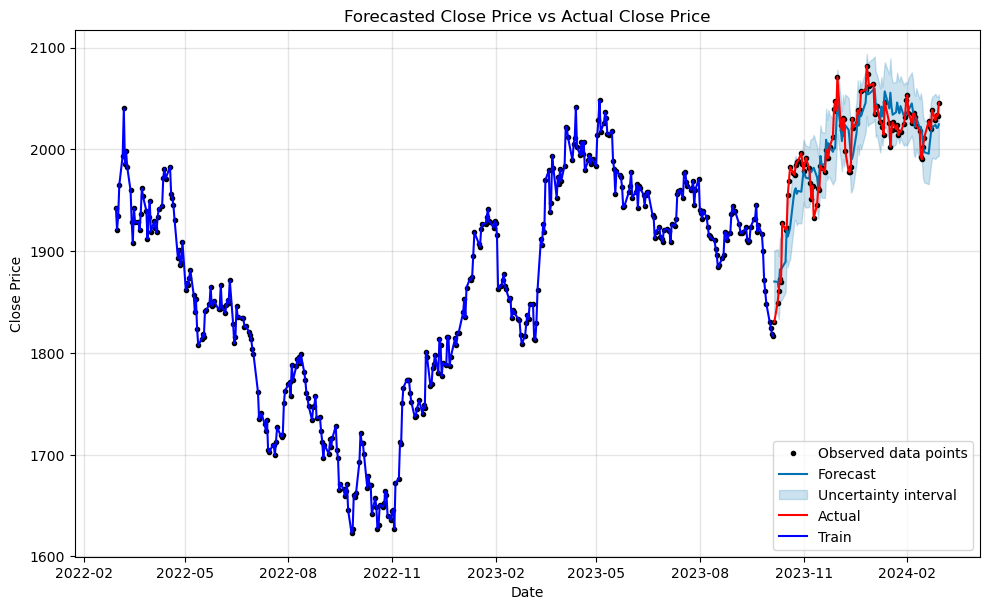

In [25]:
# Visualize results
prophet_model.plot(forecast)

# Plot actual values from y_test
plt.plot(forecast['ds'], y_test, label='Actual', color='red')  # Using forecasted dates for plotting

# Plot training data
plt.plot(X_train.index, y_train, label='Train', color='blue')

plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Forecasted Close Price vs Actual Close Price')
plt.legend()
plt.show()


In [26]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, forecast['yhat'])
print("Mean Absolute Error (MAE):", mae)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, forecast['yhat'])
print("Mean Squared Error (MSE):", mse)

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)
print("Root Mean Squared Error (RMSE):", rmse)

Mean Absolute Error (MAE): 17.70460041932776
Mean Squared Error (MSE): 487.4619178712827
Root Mean Squared Error (RMSE): 22.078539758581922
